Accuratezza: 1.0
Matrice di confusione: 
[[ 8  0]
 [ 0 12]]
Rapporto di classificazione:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        12

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



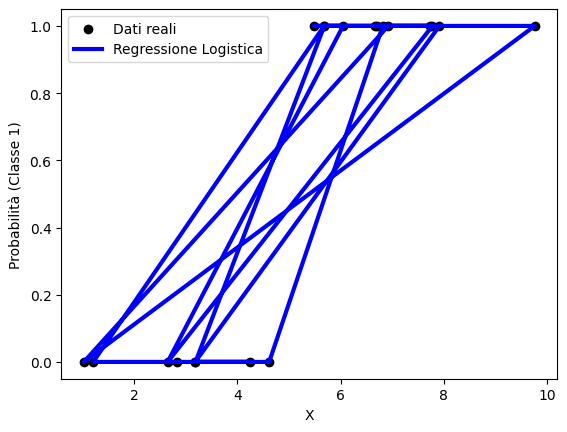

In [13]:
# Modello di Regressione Logistica
# Algoritmo supervisionato per previsione di etichette binarie (classificazione binaria, es. vero/falso, 0/1)
#
# Principali step del modello:
# 1) Dataset sintetico: generiamo dati casuali tra 0 e 10, con una classificazione binaria: 1 se la feature è maggiore di 5 altrimenti 0
# 2) Divisione del dataset: il dataset viene diviso in training set e test set
# 3) Creazione e addestramento del modello: usiamo la LogisticRegression da Scikit-learn per costruire il modello e addestrarlo con fit()
# 4) Valutazione: utilizziamo mean_squared_error per valutare la differenza tra i valori reali e quelli previsti, e r2_score per misurare quanto bene il modello spiega la varianza dei dati
# 5) Visualizzazione: il grafico finale mostra i dati reali e la linea di regressione
#
# Librerie: Scikit-learn, Matplotlib, Numpy
# 2024-09-30 - Andrea Cigliano


# Importiamo le librerie necessarie
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Creiamo un dataset sintetico
# Generiamo dei dati con due classi binarie (0 e 1) basati su una singola feature
np.random.seed(0)
X=np.random.rand(100,1) * 10
y=(X>5).astype(int).ravel() # Assegnamo 1 se X > 5, altrimenti 0

# Dividiamo il dataset in training set e test set
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=42)

# Creiamo il modello di Regressione Lineare
logistic_model=LogisticRegression()

# Addestriamo il modello sui dati di training
logistic_model.fit(X_train,y_train)

# Prevediamo sui dati di test
y_pred=logistic_model.predict(X_test)

# Calcoliamo l'accuratezza e la matrice di confusione
accuracy= accuracy_score(y_test, y_pred)
conf_matrix=confusion_matrix(y_test,y_pred)

# Stampa dei risultati
print(f"Accuratezza: {accuracy}")
print(f"Matrice di confusione: ")
print(conf_matrix)
print(f"Rapporto di classificazione:")
print(classification_report(y_test,y_pred))

# Visualizzazione dei risultati
x_vals=np.linspace(0, 10, 100).reshape(-1,1)
y_vals=logistic_model.predict_proba(x_vals)[:,1] # Probabilità che appartenga alla classe 1
plt.scatter(X_test, y_test, color="black",label="Dati reali")
plt.plot(X_test,y_pred,color="blue",linewidth=3,label="Regressione Logistica")
plt.xlabel("X")
plt.ylabel("Probabilità (Classe 1)")
plt.legend()
plt.show()